<a href="https://colab.research.google.com/github/silent-ai/chessboard/blob/main/chessboard_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#hide
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! pip install fastai --upgrade > /dev/null

In [2]:
from fastai.vision.all import *

## Download data from github

In [48]:
from zipfile import ZipFile as unzip
path = Path('data')

with unzip(download_data('https://tinyurl.com/silentdataset'), 'r') as ref:
    ref.extractall(path)

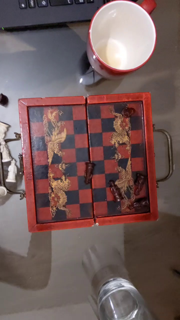

In [37]:
imgs = get_image_files(path/'images')
PILImage.create(imgs[0]).resize(size=(180, 320))

## Get annotations

In [44]:
import json
with open(path/'annotations'/'instances_default.json') as f:
  print(json.load(f))

{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'Gamespace', 'supercategory': ''}], 'images': [{'id': 1, 'width': 720, 'height': 1280, 'file_name': 'frame880.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 2, 'width': 720, 'height': 1280, 'file_name': 'frame820.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 3, 'width': 720, 'height': 1280, 'file_name': 'frame800.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 4, 'width': 720, 'height': 1280, 'file_name': 'frame80.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 5, 'width': 720, 'height': 1280, 'file_name': 'frame780.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 6, 'width': 720, 'height': 1280, 'file_name': 'frame760.jpg', 'licens

In [ ]:
def trim(x):
  points = [float(x) for x in x.values[0][3:-1].split(',')]
  return list(zip(points[::2], points[1::2]))

In [ ]:
vgg = pd.read_csv('export.csv', header=None)
labels = vgg[[1, 4]].set_index(1)
labels = labels.apply(trim, axis=1)
labels

1
["frame0.jpg"]            [(251.65, 320.0), (3.107, 605.825), (389.903, 831.068), (615.146, 483.107)]
["frame20.jpg"]          [(251.65, 389.903), (41.942, 708.35), (469.126, 894.757), (630.68, 521.942)]
["frame40.jpg"]        [(215.922, 411.65), (104.078, 790.68), (579.417, 871.456), (624.466, 455.146)]
["frame80.jpg"]        [(116.505, 540.583), (233.01, 977.087), (717.67, 817.087), (545.243, 419.417)]
["frame100.jpg"]     [(250.097, 500.194), (173.981, 852.816), (587.184, 924.272), (613.592, 560.777)]
["frame120.jpg"]       [(209.709, 517.282), (62.136, 773.592), (382.136, 925.825), (487.767, 644.66)]
["frame140.jpg"]      [(46.602, 776.699), (337.087, 1034.563), (546.796, 784.466), (288.932, 571.65)]
["frame200.jpg"]     [(69.903, 675.728), (186.408, 1088.932), (593.398, 944.466), (445.825, 590.291)]
["frame220.jpg"]    [(37.282, 796.893), (152.233, 1253.592), (598.058, 1070.291), (424.078, 669.515)]
["frame340.jpg"]    [(41.942, 782.913), (198.835, 1255.146), (646.214, 1056.311)

In [ ]:
def get_label(f):
  return tensor(labels.loc[f'["{f.name}"]'])

In [ ]:
get_label(Path('frame120.jpg'))

tensor([[209.7090, 517.2820],
        [ 62.1360, 773.5920],
        [382.1360, 925.8250],
        [487.7670, 644.6600]])

In [ ]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_label,
    item_tfms=Resize(320),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
)

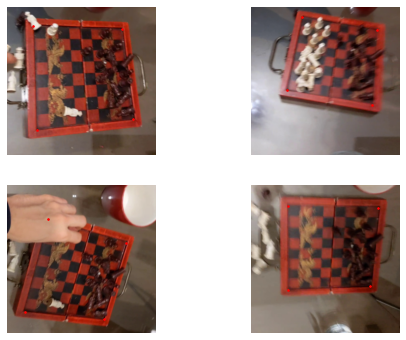

In [ ]:
dls = biwi.dataloaders(path, bs=4)
dls.show_batch(max_n=9, figsize=(8,6))

In [ ]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=1.737800812406931e-05)

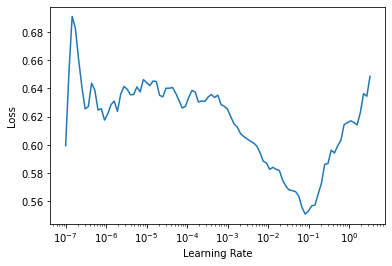

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(3, 10e-3)

epoch,train_loss,valid_loss,time
0,0.920554,0.588643,00:00


epoch,train_loss,valid_loss,time
0,0.727882,0.496823,00:01
1,0.706526,0.465438,00:01
2,0.678499,0.317453,00:00


In [ ]:
learn.show_results()

NameError: ignored